In [2]:

#Importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Random forest libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV


import warnings
warnings.filterwarnings('ignore')

In [3]:
#import data set

data = pd.read_csv(r"C:\Users\91739\Downloads\Fraud_check.csv")
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [4]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:

# Treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

data1 = data.copy()

list = []
for i in range (0, len(data)):
    if data['Taxable.Income'][i] <= 30000:
        list.append('Risky')
    elif data['Taxable.Income'][i] > 30000:
        list.append('Good')

data1['loan_asset_type'] = list

data1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,loan_asset_type
0,NO,Single,68833,50047,10,YES,Good
1,YES,Divorced,33700,134075,18,YES,Good
2,NO,Married,36925,160205,30,YES,Good
3,YES,Single,50190,193264,15,YES,Good
4,NO,Married,81002,27533,28,NO,Good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,Good
596,YES,Divorced,69967,55369,2,YES,Good
597,NO,Divorced,47334,154058,0,YES,Good
598,YES,Married,98592,180083,17,NO,Good


In [7]:
data1.loan_asset_type.value_counts()

Good     476
Risky    124
Name: loan_asset_type, dtype: int64

#Data Visualization

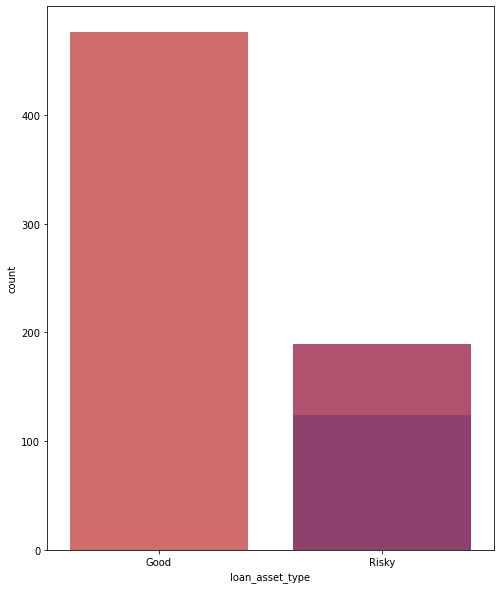

In [8]:
#countplot for categorical variables
plt.figure(figsize=(8,10))

sns.countplot(data1['Marital.Status'], palette='flare')
sns.countplot(data1['loan_asset_type'], palette='flare')

plt.show()

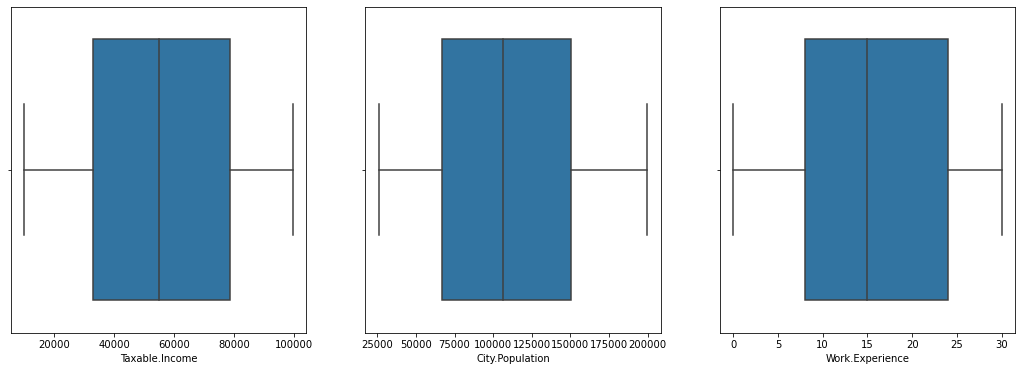

In [9]:

# Box plot for outlier detection
plt.figure(figsize=(18,6))

plt.subplot(1,3,1)
sns.boxplot(data1['Taxable.Income'])

plt.subplot(1,3,2)
sns.boxplot(data1['City.Population'])

plt.subplot(1,3,3)
sns.boxplot(data1['Work.Experience'] )

plt.show()

# No outliers

Data Preprocessing

In [10]:

data2 = data1.copy()
data2 = data2.rename(columns={'Undergrad':'undergrad' , 'Marital.Status':'marital_status', 'Taxable.Income':'taxable_income', 'City.Population':'city_population', 'Work.Experience': 'workxp', 'Urban':'urban'})
data2.drop('taxable_income', axis=1, inplace=True)

In [11]:
data2.head()

,undergrad,marital_status,city_population,workxp,urban,loan_asset_type
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


In [12]:
data2.loan_asset_type.value_counts()

Good     476
Risky    124
Name: loan_asset_type, dtype: int64

In [13]:

# encoding categorical variables
#but technique to encode input cat variable and output cat variable is different.
#so lets split data into x and y

In [14]:
x = data2.drop('loan_asset_type', axis=1)
y = data2['loan_asset_type']

In [15]:
x = pd.get_dummies(x) # encoding input categorical variables

In [16]:
le = LabelEncoder()
y = le.fit_transform(y) # encoding output categorical variables

In [17]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=40)

In [18]:

print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)


Shape of X_train:  (480, 9)
Shape of X_test:  (120, 9)
Shape of y_train:  (480,)
Shape of y_test (120,)


Building Random Forest Classifier

In [19]:
num_trees = 100
max_features = 3

kfold = KFold(n_splits=10, random_state=7, shuffle=True)

model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)

print('Batchwise accuracy is:', '\n', results,'\n')
print('Overall accuracy is:', results.mean())

Batchwise accuracy is: 
 [0.76666667 0.63333333 0.81666667 0.85       0.7        0.65
 0.7        0.61666667 0.76666667 0.75      ] 

Overall accuracy is: 0.725


In [24]:
#Grid search for hyper parameter tuning

kfold = KFold(n_splits=10, random_state=7, shuffle=True)

param_dict = { 
    "criterion":["gini","entropy"],
    'n_estimators':[10,25,50,75,100,125,150],
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200]   
}

rf = RandomForestClassifier(random_state=7)

grid = GridSearchCV(rf, param_grid=param_dict, cv=kfold)
grid.fit(x, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=7, shuffle=True),
             estimator=RandomForestClassifier(random_state=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 75, 100, 125, 150]})

In [25]:
print(grid.best_score_)
print(grid.best_params_) 

0.7933333333333332
{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'n_estimators': 10}


In [26]:
#Building final model on grid.best_params_ parameters

model_kf =grid.best_estimator_
model_kf.fit(x, y)

results = cross_val_score(model_kf, x, y, cv=kfold)
print('Accuracy with k fold validation', np.round(results.mean(),3)) 

Accuracy with k fold validation 0.793


In [27]:
model = grid.best_estimator_ 
model.fit(x_train, y_train)

pred=model.predict(x_test)
print('Accuracy with train test split:', accuracy_score(y_test, pred))

Accuracy with train test split: 0.7666666666666667


In [28]:
print(classification_report(y_test, pred))  

              precision    recall  f1-score   support

           0       0.77      1.00      0.87        92
           1       0.00      0.00      0.00        28

    accuracy                           0.77       120
   macro avg       0.38      0.50      0.43       120
weighted avg       0.59      0.77      0.67       120



<AxesSubplot:>

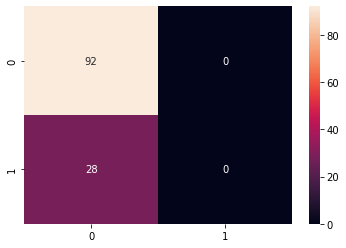

In [30]:
sns.heatmap(confusion_matrix(y_test, pred), annot=True) 